In [1]:
# Import the needed packages

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
import networkx as nx

In [2]:
# read in the needed data

agent_log_1_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-10-16/agent_log_1.csv')
counts_log_1_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-10-16/counts_log_1.csv')
network_log_1_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-10-16/network_log_1.csv')

In [4]:
# Print out the number of connections in each time step
network_1_count_summary = network_log_1_df.groupby(['tick'])['tick'].count()
network_1_count_summary = pd.DataFrame(data=network_1_count_summary)
print(network_1_count_summary)

# The first time starts at time 1

       tick
tick       
1     50090
11    50090
21    50090
31    50090
41    50090
...     ...
951   50041
961   50041
971   50041
981   50041
991   50041

[100 rows x 1 columns]


In [5]:
network_log_1_df_time_0 = network_log_1_df.loc[network_log_1_df['tick'] == 0]
network_log_1_df_time_1 = network_log_1_df.loc[network_log_1_df['tick'] == 1]
network_log_1_df_time_91 = network_log_1_df.loc[network_log_1_df['tick'] == 91]
network_log_1_df_time_491 = network_log_1_df.loc[network_log_1_df['tick'] == 491]
network_log_1_df_time_991 = network_log_1_df.loc[network_log_1_df['tick'] == 991]

agent_log_1_df_time_0 = agent_log_1_df.loc[agent_log_1_df['tick'] == 0]
agent_log_1_df_time_1 = agent_log_1_df.loc[agent_log_1_df['tick'] == 1]
agent_log_1_df_time_91 = agent_log_1_df.loc[agent_log_1_df['tick'] == 91]
agent_log_1_df_time_491 = agent_log_1_df.loc[agent_log_1_df['tick'] == 491]
agent_log_1_df_time_991 = agent_log_1_df.loc[agent_log_1_df['tick'] == 991]

# Analyze the networks part

### Q1: How many people are connected in the beginning (time step 1)?

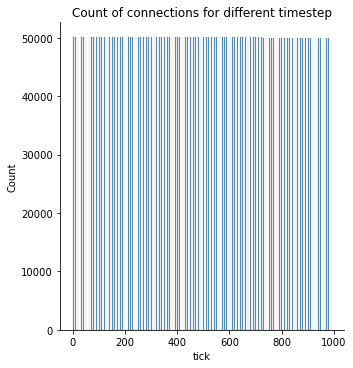

In [5]:
sns.displot(network_log_1_df, x="tick", binwidth=3).set(title='Count of connections for different timestep')

[Text(0.5, 1.0, 'Count of agents in different time ticks')]

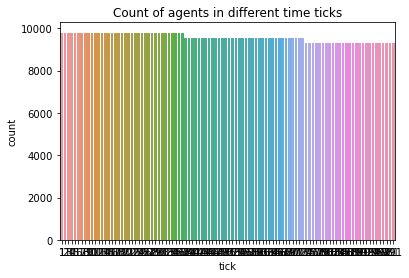

In [6]:
#sns.displot(agent_log_1_df, x="tick")
sns.countplot(x='tick', data=agent_log_1_df).set(title='Count of agents in different time ticks')

In [7]:
print(network_log_1_df_time_1)

       tick    p1     p2
0         1     0    107
1         1     0   1529
2         1     0   1770
3         1     0   2717
4         1     0   3423
...     ...   ...    ...
50085     1  9971  10163
50086     1  9979   9994
50087     1  9983  10065
50088     1  9990  10029
50089     1  9998  10098

[50090 rows x 3 columns]


In [8]:
network_log_1_df_time_1_p1 = network_log_1_df_time_1['p1'].tolist()
network_log_1_df_time_1_p2 = network_log_1_df_time_1['p2'].tolist()

print("The number of people that has connections at time step 1 is",len(np.unique(network_log_1_df_time_1_p1 + network_log_1_df_time_1_p2)))

The number of people that has connections at time step 1 is 10000


In [9]:
network_log_1_df_time_1_connections_list = []
for i in range(network_log_1_df_time_1.shape[0]):
    network_log_1_df_time_1_connections_list.append({network_log_1_df_time_1.iloc[i]["p1"], network_log_1_df_time_1.iloc[i]["p2"]})

network_log_1_df_time_1_connections_list_res = []
for item in network_log_1_df_time_1_connections_list: 
    if item not in network_log_1_df_time_1_connections_list_res: 
        network_log_1_df_time_1_connections_list_res.append(item) 

print("unique number of cennections at time 1 is", len(network_log_1_df_time_1_connections_list_res))

unique number of cennections at time 1 is 50090


### Q2: How many at the end (time step 1000)?

In [10]:
print(network_log_1_df_time_991)

         tick    p1     p2
4959760   991     0    107
4959761   991     0   1529
4959762   991     0   1770
4959763   991     0   2717
4959764   991     0   3423
...       ...   ...    ...
5009796   991  9990  10395
5009797   991  9993  10421
5009798   991  9997  10593
5009799   991  9998  10098
5009800   991  9998  10543

[50041 rows x 3 columns]


In [11]:
network_log_1_df_time_991_p1 = network_log_1_df_time_991['p1'].tolist()
network_log_1_df_time_991_p2 = network_log_1_df_time_991['p2'].tolist()

print("The number of people that has connections at time step 991 is",len(np.unique(network_log_1_df_time_991_p1 + network_log_1_df_time_991_p2)))

The number of people that has connections at time step 991 is 10000


In [12]:
network_log_1_df_time_991_connections_list = []
for i in range(network_log_1_df_time_991.shape[0]):
    network_log_1_df_time_991_connections_list.append({network_log_1_df_time_991.iloc[i]["p1"], network_log_1_df_time_991.iloc[i]["p2"]})

network_log_1_df_time_991_connections_list_res = []
for item in network_log_1_df_time_991_connections_list: 
    if item not in network_log_1_df_time_991_connections_list_res: 
        network_log_1_df_time_991_connections_list_res.append(item) 

print("unique number of cennections at time 991 is", len(network_log_1_df_time_991_connections_list_res))

unique number of cennections at time 991 is 50041


### Q3: How many at some point in the middle (around 500)?

In [13]:
print(network_log_1_df_time_491)

         tick    p1     p2
2455118   491     0    107
2455119   491     0   1529
2455120   491     0   1770
2455121   491     0   2717
2455122   491     0   3423
...       ...   ...    ...
2505262   491  9985  10339
2505263   491  9990  10029
2505264   491  9990  10395
2505265   491  9993  10421
2505266   491  9998  10098

[50149 rows x 3 columns]


In [14]:
network_log_1_df_time_491_p1 = network_log_1_df_time_491['p1'].tolist()
network_log_1_df_time_491_p2 = network_log_1_df_time_491['p2'].tolist()

print("The number of people that has connections at time step 491 is",len(np.unique(network_log_1_df_time_491_p1 + network_log_1_df_time_491_p2)))

The number of people that has connections at time step 491 is 10000


In [15]:
network_log_1_df_time_491_connections_list = []
for i in range(network_log_1_df_time_491.shape[0]):
    network_log_1_df_time_491_connections_list.append({network_log_1_df_time_491.iloc[i]["p1"], network_log_1_df_time_491.iloc[i]["p2"]})

network_log_1_df_time_491_connections_list_res = []
for item in network_log_1_df_time_491_connections_list: 
    if item not in network_log_1_df_time_491_connections_list_res: 
        network_log_1_df_time_491_connections_list_res.append(item) 

print("unique number of cennections at time 491 is", len(network_log_1_df_time_491_connections_list_res))

unique number of cennections at time 491 is 50149


### Q4: Of the relationships that exist in the beginning, how many exist at time step 100? How many exist at 500? At the end?

In [16]:
print("unique number of cennections at time 1 is", len(network_log_1_df_time_1_connections_list_res))

unique number of cennections at time 1 is 50090


In [17]:
network_log_1_df_time_91_p1 = network_log_1_df_time_91['p1'].tolist()
network_log_1_df_time_91_p2 = network_log_1_df_time_91['p2'].tolist()


network_log_1_df_time_91_connections_list = []

for i in range(network_log_1_df_time_91.shape[0]):
    network_log_1_df_time_91_connections_list.append({network_log_1_df_time_91.iloc[i]["p1"], network_log_1_df_time_91.iloc[i]["p2"]})


network_time_still_exist_at_91 = []

for item in network_log_1_df_time_1_connections_list: 
    if item in network_log_1_df_time_91_connections_list: 
        network_time_still_exist_at_91.append(item) 

print("still exist at step 91:", len(network_time_still_exist_at_91))

still exist at step 91: 50090


In [18]:
network_time_still_exist_at_491 = []

for item in network_log_1_df_time_1_connections_list: 
    if item in network_log_1_df_time_491_connections_list: 
        network_time_still_exist_at_491.append(item) 

print("still exist at step 491:", len(network_time_still_exist_at_491))

still exist at step 491: 47658


In [19]:
network_time_still_exist_at_991 = []

for item in network_log_1_df_time_1_connections_list: 
    if item in network_log_1_df_time_991_connections_list: 
        network_time_still_exist_at_991.append(item) 

print("still exist at step 991:", len(network_time_still_exist_at_991))

still exist at step 991: 45438


### Q5: Compare the agent and link differences between different time sticks

In [20]:
def compare_agent_difference(time_a, time_b, count_links_or_not):
    agent_log_1_df_time_a = agent_log_1_df.loc[agent_log_1_df['tick'] == time_a]
    agent_log_1_df_time_b = agent_log_1_df.loc[agent_log_1_df['tick'] == time_b]
    
    agent_log_1_df_time_a_list = agent_log_1_df_time_a['agent_id'].tolist()
    agent_log_1_df_time_b_list = agent_log_1_df_time_b['agent_id'].tolist()
    
    agents_in_a_but_not_in_b = []
    agents_in_b_but_not_in_a = []
    
    for item in agent_log_1_df_time_a_list: 
        if item not in agent_log_1_df_time_b_list: 
            agents_in_a_but_not_in_b.append(item)
    
    for item in agent_log_1_df_time_b_list: 
        if item not in agent_log_1_df_time_a_list: 
            agents_in_b_but_not_in_a.append(item)
        
    print("Here are the agents in time", time_a, "but not in time", time_b, agents_in_a_but_not_in_b)
    print("Here are the agents in time", time_b, "but not in time", time_a, agents_in_b_but_not_in_a)
    
    if count_links_or_not == True:
        links_of_agents_in_a_but_not_in_b = []
        links_of_agents_in_b_but_not_in_a = []
        
        for agent in agents_in_a_but_not_in_b:
            links_of_agents_in_a_but_not_in_b.append([agent, len(network_log_1_df.loc[(network_log_1_df['tick'] == time_a)&((network_log_1_df['p1'] == agent) | (network_log_1_df['p2'] == agent))])])
        
        for agent in agents_in_b_but_not_in_a:
            links_of_agents_in_b_but_not_in_a.append([agent, len(network_log_1_df.loc[(network_log_1_df['tick'] == time_b)&((network_log_1_df['p1'] == agent) | (network_log_1_df['p2'] == agent))])])
        
        print("Here are the agents and the number of links assigned to them in a not in b:", links_of_agents_in_a_but_not_in_b)
        print("Here are the agents and the number of links assigned to them in b not in a:", links_of_agents_in_b_but_not_in_a)
    


In [21]:
compare_agent_difference(1, 371, True)

Here are the agents in time 1 but not in time 371 [52, 172, 244, 249, 252, 358, 360, 549, 565, 597, 608, 777, 808, 839, 886, 913, 925, 1009, 1056, 1105, 1127, 1168, 1188, 1196, 1222, 1243, 1346, 1362, 1414, 1485, 1524, 1542, 1674, 1701, 1728, 1741, 1757, 1815, 1836, 1838, 1880, 1893, 1895, 2042, 2088, 2207, 2215, 2267, 2277, 2285, 2290, 2341, 2366, 2388, 2404, 2439, 2483, 2560, 2570, 2576, 2601, 2609, 2633, 2693, 2713, 2727, 2743, 2751, 2803, 2824, 2846, 2865, 2889, 2947, 2997, 3024, 3098, 3116, 3145, 3152, 3166, 3199, 3226, 3231, 3248, 3269, 3274, 3327, 3396, 3432, 3505, 3560, 3561, 3566, 3578, 3579, 3680, 3682, 3729, 3731, 3763, 3770, 3796, 3797, 3800, 3835, 3924, 3973, 4023, 4032, 4110, 4215, 4218, 4408, 4421, 4432, 4456, 4483, 4514, 4517, 4549, 4567, 4577, 4591, 4647, 4677, 4773, 4800, 4853, 4854, 4913, 4951, 4972, 4980, 4997, 5018, 5130, 5163, 5234, 5315, 5317, 5340, 5356, 5381, 5412, 5442, 5466, 5504, 5542, 5551, 5558, 5581, 5645, 5649, 5742, 5785, 5823, 5866, 5870, 5903, 5966, 5

In [22]:
compare_agent_difference(1, 91, False)

Here are the agents in time 1 but not in time 91 []
Here are the agents in time 91 but not in time 1 []


In [23]:
compare_agent_difference(1, 491, False)

Here are the agents in time 1 but not in time 491 [52, 172, 244, 249, 252, 358, 360, 549, 565, 597, 608, 777, 808, 839, 886, 913, 925, 1009, 1056, 1105, 1127, 1168, 1188, 1196, 1222, 1243, 1346, 1362, 1414, 1485, 1524, 1542, 1674, 1701, 1728, 1741, 1757, 1815, 1836, 1838, 1880, 1893, 1895, 2042, 2088, 2207, 2215, 2267, 2277, 2285, 2290, 2341, 2366, 2388, 2404, 2439, 2483, 2560, 2570, 2576, 2601, 2609, 2633, 2693, 2713, 2727, 2743, 2751, 2803, 2824, 2846, 2865, 2889, 2947, 2997, 3024, 3098, 3116, 3145, 3152, 3166, 3199, 3226, 3231, 3248, 3269, 3274, 3327, 3396, 3432, 3505, 3560, 3561, 3566, 3578, 3579, 3680, 3682, 3729, 3731, 3763, 3770, 3796, 3797, 3800, 3835, 3924, 3973, 4023, 4032, 4110, 4215, 4218, 4408, 4421, 4432, 4456, 4483, 4514, 4517, 4549, 4567, 4577, 4591, 4647, 4677, 4773, 4800, 4853, 4854, 4913, 4951, 4972, 4980, 4997, 5018, 5130, 5163, 5234, 5315, 5317, 5340, 5356, 5381, 5412, 5442, 5466, 5504, 5542, 5551, 5558, 5581, 5645, 5649, 5742, 5785, 5823, 5866, 5870, 5903, 5966, 5

In [24]:
compare_agent_difference(1, 991, False)

Here are the agents in time 1 but not in time 991 [3, 52, 60, 97, 115, 117, 128, 149, 172, 200, 244, 249, 252, 285, 344, 356, 358, 360, 424, 494, 503, 512, 515, 549, 565, 580, 590, 597, 604, 608, 614, 734, 777, 808, 839, 886, 913, 925, 961, 1009, 1056, 1064, 1105, 1127, 1131, 1168, 1171, 1178, 1188, 1196, 1222, 1229, 1232, 1243, 1266, 1287, 1346, 1351, 1357, 1362, 1406, 1411, 1414, 1417, 1439, 1485, 1509, 1524, 1542, 1559, 1593, 1650, 1674, 1701, 1728, 1741, 1757, 1782, 1802, 1815, 1836, 1838, 1842, 1880, 1893, 1895, 1904, 1932, 1939, 2037, 2041, 2042, 2088, 2140, 2142, 2143, 2152, 2207, 2215, 2217, 2219, 2225, 2267, 2277, 2285, 2290, 2311, 2341, 2366, 2369, 2380, 2388, 2404, 2439, 2481, 2483, 2524, 2560, 2570, 2576, 2601, 2609, 2633, 2654, 2693, 2713, 2727, 2743, 2751, 2774, 2776, 2803, 2824, 2846, 2865, 2866, 2889, 2947, 2965, 2980, 2997, 3024, 3035, 3098, 3116, 3145, 3152, 3157, 3166, 3199, 3207, 3226, 3227, 3231, 3235, 3246, 3248, 3269, 3274, 3327, 3396, 3407, 3432, 3454, 3459, 348

In [25]:
compare_agent_difference(491, 991, False)

Here are the agents in time 491 but not in time 991 [3, 60, 97, 115, 117, 128, 149, 200, 285, 344, 356, 424, 494, 503, 512, 515, 580, 590, 604, 614, 734, 961, 1064, 1131, 1171, 1178, 1229, 1232, 1266, 1287, 1351, 1357, 1406, 1411, 1417, 1439, 1509, 1559, 1593, 1650, 1782, 1802, 1842, 1904, 1932, 1939, 2037, 2041, 2140, 2142, 2143, 2152, 2217, 2219, 2225, 2311, 2369, 2380, 2481, 2524, 2654, 2774, 2776, 2866, 2965, 2980, 3035, 3157, 3207, 3227, 3235, 3246, 3407, 3454, 3459, 3483, 3486, 3492, 3512, 3615, 3674, 3720, 3792, 3810, 3839, 3957, 3996, 3999, 4069, 4096, 4115, 4198, 4221, 4335, 4355, 4377, 4487, 4523, 4533, 4623, 4736, 4761, 4785, 4830, 4834, 4865, 4906, 5069, 5112, 5116, 5136, 5171, 5205, 5257, 5270, 5276, 5277, 5278, 5310, 5312, 5343, 5366, 5380, 5495, 5552, 5597, 5679, 5794, 5827, 5828, 5855, 5874, 5914, 5942, 5962, 5994, 6091, 6136, 6137, 6176, 6228, 6243, 6361, 6374, 6382, 6402, 6419, 6420, 6543, 6577, 6580, 6662, 6744, 6790, 6794, 7021, 7169, 7183, 7199, 7201, 7231, 7351, 7

In [26]:
# Now we want to make sure that if time 0 exists
print(network_log_1_df_time_0)
print(agent_log_1_df_time_0)

#Nope, time 0 does not exist

Empty DataFrame
Columns: [tick, p1, p2]
Index: []
Empty DataFrame
Columns: [tick, agent_id, agent_age, agent_race, agent_female, agent_alc_use_status, agent_smoking_status, agent_last_incarceration_tick, agent_last_release_tick, agent_current_incarceration_status]
Index: []


# Analyze the agent_log part

### Q6: Visualize the networks: beginning, middle, end. Create different versions of this network structure, where nodes are highlighted by age, race, sex, incarceration status, etc etc. 


In [27]:
print(agent_log_1_df_time_1)

      tick  agent_id  agent_age agent_race  agent_female  \
0        1         0         44      Black             0   
1        1         1         38      White             1   
2        1         2         47      White             0   
3        1         3         62      White             0   
4        1         4         45      White             1   
...    ...       ...        ...        ...           ...   
9789     1      9995         53      White             0   
9790     1      9996         63   Hispanic             0   
9791     1      9997         46      White             1   
9792     1      9998         48      White             1   
9793     1      9999         63      Black             0   

      agent_alc_use_status agent_smoking_status  \
0                        1                Never   
1                        1               Former   
2                        0               Former   
3                        2               Former   
4                       

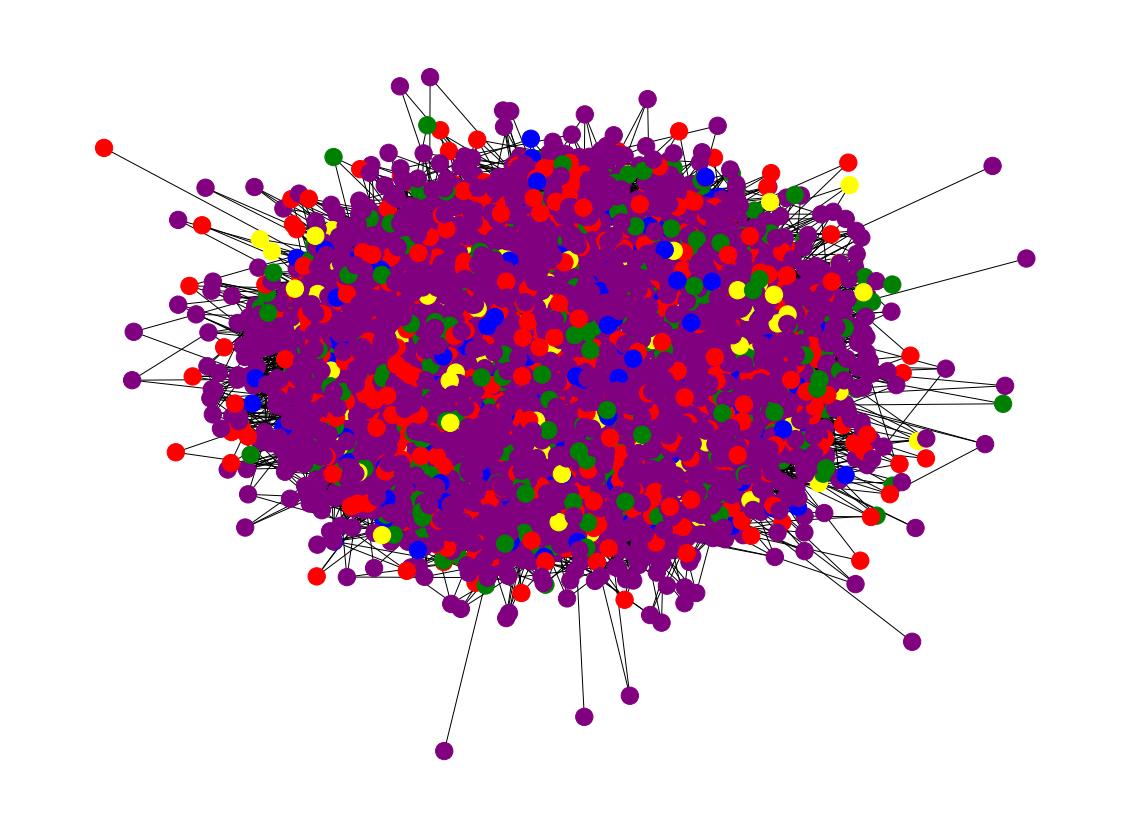

In [31]:
agent_log_1_df_time_1 = agent_log_1_df.loc[agent_log_1_df['tick'] == 1]
# Create graph object
fig, ax = plt.subplots(figsize=(20, 15))

G = nx.from_pandas_edgelist(network_log_1_df_time_1, 'p1', 'p2', create_using=nx.Graph())

# Make types into categories
agent_log_1_df_time_1 = agent_log_1_df_time_1.set_index('agent_id')
agent_log_1_df_time_1 = agent_log_1_df_time_1.reindex(G.nodes())

agent_log_1_df_time_1['agent_race'] = pd.Categorical(agent_log_1_df_time_1['agent_race'])
agent_log_1_df_time_1['agent_race'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['yellow', 'blue', 'green', 'red', 'purple'])


# Black:blue, white:red, asian:green, Hispanic:green, Asian:yellow, NaN:purple
# Draw graph
nx.draw(G, with_labels=False, node_color=agent_log_1_df_time_1['agent_race'].cat.codes, cmap=cmap)

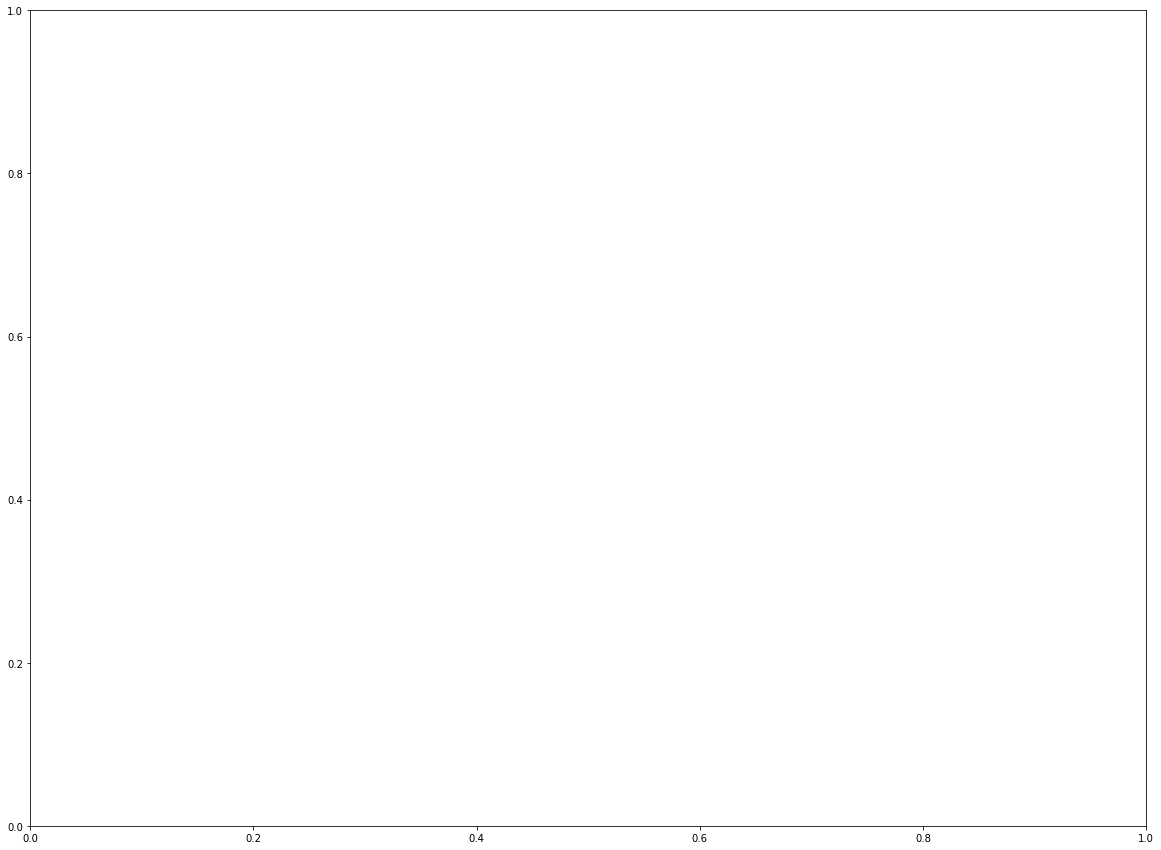

In [6]:
agent_log_1_df_time_1 = agent_log_1_df.loc[agent_log_1_df['tick'] == 1]
# Create graph object
fig, ax = plt.subplots(figsize=(20, 15))

G = nx.from_pandas_edgelist(network_log_1_df_time_1, 'p1', 'p2', create_using=nx.Graph())

# Make types into categories
agent_log_1_df_time_1 = agent_log_1_df_time_1.set_index('agent_id')
agent_log_1_df_time_1 = agent_log_1_df_time_1.reindex(G.nodes())

agent_log_1_df_time_1['agent_race'] = pd.Categorical(agent_log_1_df_time_1['agent_race'])
agent_log_1_df_time_1['agent_race'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['yellow', 'blue', 'green', 'red', 'purple'])


In [7]:
print(agent_log_1_df_time_1['agent_race'].cat.codes)

agent_id
0       1
107     3
1529    3
1770    1
2717    3
       ..
9531    2
9058    3
8045    3
7381    1
9059    3
Length: 10000, dtype: int8


In [13]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 1000})

k=agent_log_1_df_time_1['agent_race'].cat.codes
print(k)

agent_id
0       1
107     3
1529    3
1770    1
2717    3
       ..
9531    2
9058    3
8045    3
7381    1
9059    3
Length: 10000, dtype: int8


In [17]:
print(agent_log_1_df_time_1['agent_race'].unique())
print(agent_log_1_df_time_1['agent_race'].isnull().sum())

['Black', 'White', 'Asian', 'Hispanic', NaN]
Categories (4, object): ['Asian', 'Black', 'Hispanic', 'White']
206
